This notebook uses auto-regression techniques to study the behavior in the calibration value.

In [5]:
#import the stuff
import pandas as pd #dataframes etc
import matplotlib.pyplot as plt #plotting
import numpy as np
from sklearn import preprocessing
from common.utils import TimeSeriesTensor, create_evaluation_df, mape, scale_shrinker

In [62]:
#load the data
test = pd.read_csv('../data/test_avg.csv', index_col=0)
valid = pd.read_csv('../data/valid_avg.csv', index_col=0)
train = pd.read_csv('../data/train_avg.csv', index_col=0)
#fix index
test.index = pd.to_datetime(test.index).to_period('H')
valid.index = pd.to_datetime(valid.index).to_period('H')
train.index = pd.to_datetime(train.index).to_period('H')
#df.index = pd.DatetimeIndex(df.index).to_period('M')
#only take calibration values
test = test[['p2_calib']]
valid = valid[['p2_calib']]
train = train[['p2_calib']]

full = train.append([valid,test])
full.head()

,p2_calib
2018-05-12 08:00,0.912935
2018-05-12 20:00,0.912406
2018-05-13 08:00,0.913120
2018-05-13 20:00,0.911564
2018-05-14 08:00,0.912341


In [63]:
full.tail()

,p2_calib
2018-12-02 10:00,0.910266
2018-12-02 11:00,0.910792
2018-12-02 12:00,0.910588
2018-12-02 13:00,0.910575
2018-12-02 14:00,0.910599


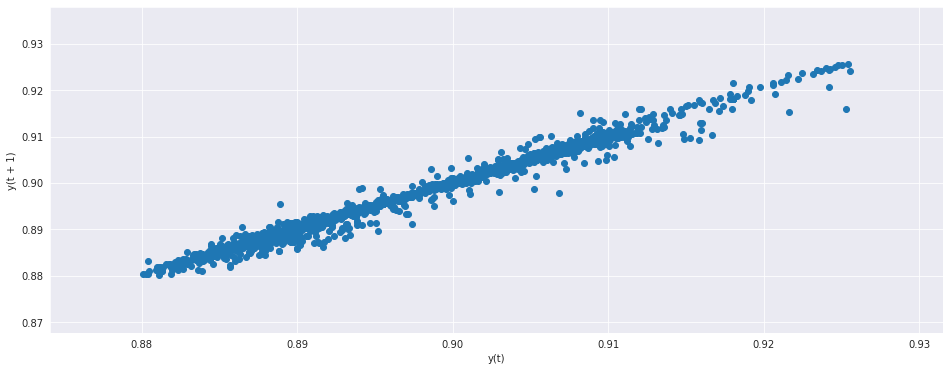

In [64]:
pd.plotting.lag_plot(full.p2_calib, lag=1)

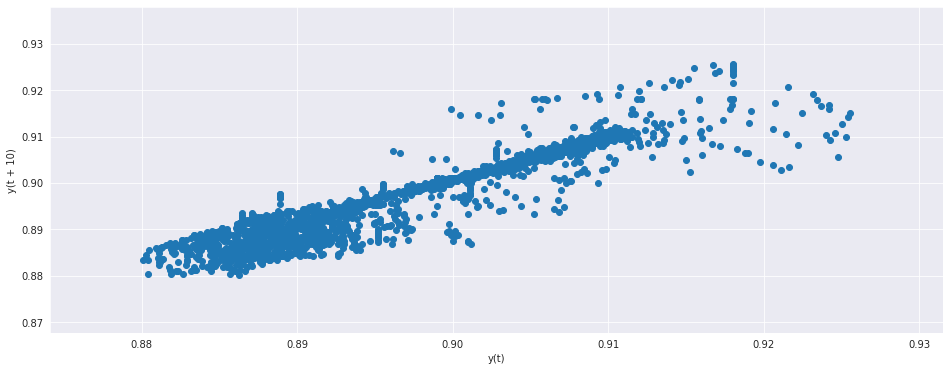

In [65]:
pd.plotting.lag_plot(full.p2_calib, lag=10)

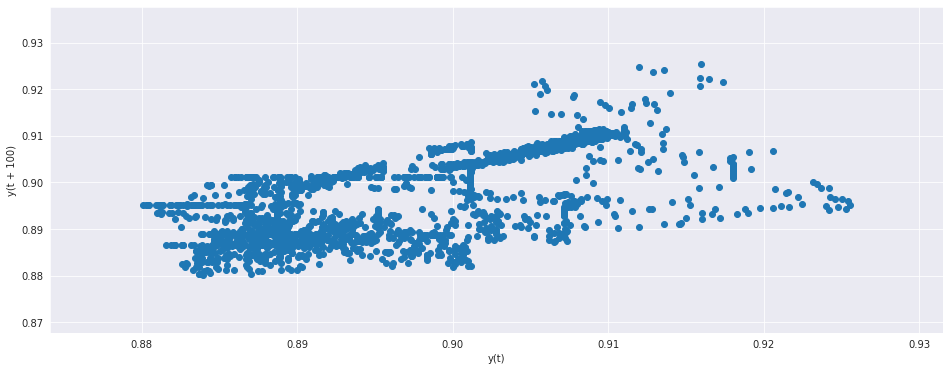

In [66]:
pd.plotting.lag_plot(full.p2_calib, lag=100)

In [67]:
#pd.plotting.lag_plot(test.int_deliv_inv_ub, lag=1)

In [68]:
#pd.plotting.lag_plot(test.int_deliv_inv_ub, lag=10)

In [69]:
#pd.plotting.lag_plot(test.int_deliv_inv_ub, lag=100)

(-0.5, 1)

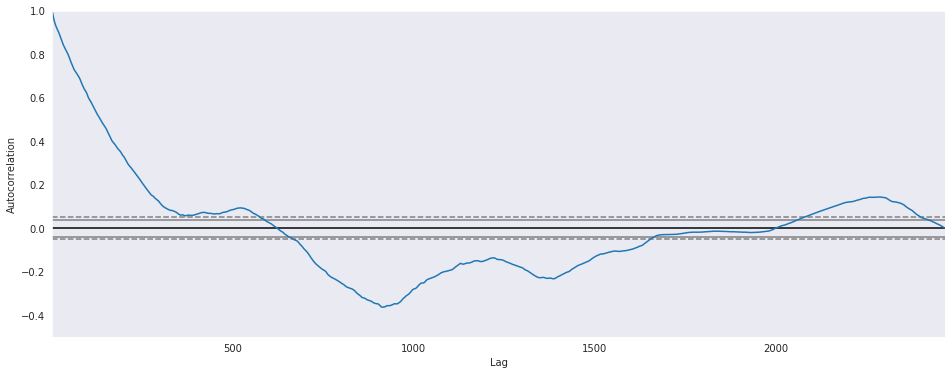

In [70]:
pd.plotting.autocorrelation_plot(full.p2_calib)
plt.ylim([-0.5, 1])

In [71]:
#pd.plotting.autocorrelation_plot(test.int_deliv_inv_ub)
#plt.ylim([-.2,1])

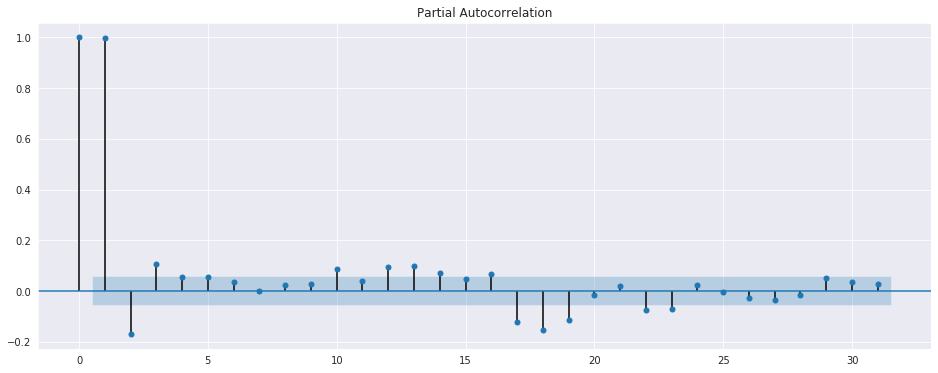

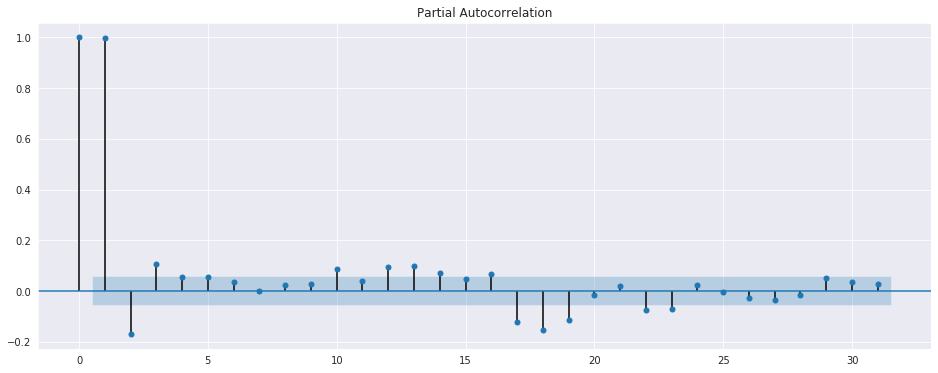

In [72]:
#partial auto-correlation
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(test.p2_calib)

In [73]:
#now lets try some autoregression
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [81]:
model = AutoReg(full.p2_calib, 10, trend='ct', old_names=True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               p2_calib   No. Observations:                 2469
Model:                    AutoReg(10)   Log Likelihood               13402.311
Method:               Conditional MLE   S.D. of innovations              0.001
Date:                Fri, 12 Mar 2021   AIC                            -13.728
Time:                        09:33:56   BIC                            -13.697
Sample:                    05-17-2018   HQIC                           -13.717
                         - 12-02-2018                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0060      0.002      2.873      0.004       0.002       0.010
trend         5.797e-08   3.06e-08      1.897      0.058   -1.94e-09    1.18e-07
p2_calib.L1      1.1050      0.020     54.812      0.000       1.065       1.145
p2_calib.L2     -0.1390      0.030     -4.628      0.000      -0.198      -0.080
p2_calib.L3      0.0209      0.030      0.694      0.488      -0.038       0.080
p2_calib.L4     -0.0501      0.030     -1.665      0.096      -0.109       0.009
p2_calib.L5     -0.0165      0.030     -0.547      0.584      -0.075       0.043
p2_calib.L6      0.0356      0.030      1.183      0.237      -0.023       0.095
p2_calib.L7      0.0446      0.030      1.482      0.138      -0.014       0.104
p2_calib.L8     -0.0852      0.030     -2.833      0.005      -0.144      -0.026
p2_calib.L9      0.0537      0.030      1.790      0.073      -0.005       0.112
p2_calib.L10     0.0242      0.020      1.204      0.228      -0.015       0.064
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0057           -0.0000j            1.0057           -0.0000
AR.2             1.1447           -0.5520j            1.2708           -0.0715
AR.3             1.1447           +0.5520j            1.2708            0.0715
AR.4             0.6516           -1.2367j            1.3979           -0.1728
AR.5             0.6516           +1.2367j            1.3979            0.1728
AR.6            -0.4004           -1.2827j            1.3437           -0.2982
AR.7            -0.4004           +1.2827j            1.3437            0.2982
AR.8            -1.3151           -0.6329j            1.4595           -0.4286
AR.9            -1.3151           +0.6329j            1.4595            0.4286
AR.10           -3.3837           -0.0000j            3.3837           -0.5000
------------------------------------------------------------------------------
"""

In [82]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(16,6))

figure = results.plot_predict()

TypeError: Axis must have `freq` set to convert to Periods

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x2b6805cd5378> (for post_execute):


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1152x432 with 1 Axes>

In [77]:
fig = plt.figure(figsize=(16,9))
fig = results.plot_diagnostics(fig=fig, lags=20)

/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]


TypeError: Axis must have `freq` set to convert to Periods

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x2b6805cd5378> (for post_execute):


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1152x648 with 1 Axes>

In [78]:
#lets pool the valid and train data together
train = train.append(valid)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train['p2_calib'] = scaler.fit_transform(train)[:,0]
train.head()

,p2_calib
2018-05-12 08:00,0.701984
2018-05-12 20:00,0.689503
2018-05-13 08:00,0.706344
2018-05-13 20:00,0.669668
2018-05-14 08:00,0.687979


In [79]:
test['p2_calib'] = scaler.transform(test)

#Number of steps to forecast ahead
test_shifted = test.copy()
HORIZON = 3
#create test data points for each horizon
for t in range(1, HORIZON):
    test_shifted['p2_calib+'+str(t)] = test_shifted['p2_calib'].shift(-t, freq='H')
                 
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,p2_calib,p2_calib+1,p2_calib+2
2018-10-15 00:00,0.381686,0.386312,0.375850
2018-10-15 01:00,0.386312,0.375850,0.375061
2018-10-15 02:00,0.375850,0.375061,0.380230
2018-10-15 03:00,0.375061,0.380230,0.383863
2018-10-15 04:00,0.380230,0.383863,0.378203


In [84]:
#make predictions on the test data
training_window = 500
train_series = train['p2_calib']
test_series = test_shifted

history = [x for x in train_series]
history = history[(-training_window):]

predictions = list()

for t in range(test_series.shape[0]):
    model = AutoReg(history, 1, old_names=True)
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=HORIZON)
    predictions.append(yhat)
    obs = list(test_series.iloc[t])
    # move the training window
    history.append(obs[0])
    history.pop(0)
    print(test_series.index[t])
    print(t+1, ': predicted =', yhat, 'expected =', obs)

2018-10-15 00:00
1 : predicted = [0.37001553 0.36490966 0.35993457] expected = [0.3816861474654445, 0.3863121207137077, 0.37585003195952993]
2018-10-15 01:00
2 : predicted = [0.37636912 0.3711864  0.36613457] expected = [0.3863121207137077, 0.37585003195952993, 0.37506113052460677]
2018-10-15 02:00
3 : predicted = [0.38093518 0.37569275 0.37058146] expected = [0.37585003195952993, 0.37506113052460677, 0.3802295908083053]
2018-10-15 03:00
4 : predicted = [0.37045769 0.36520546 0.3600897 ] expected = [0.37506113052460677, 0.3802295908083053, 0.3838633972702965]
2018-10-15 04:00
5 : predicted = [0.36959562 0.36427389 0.35909214] expected = [0.3802295908083053, 0.3838633972702965, 0.3782034341079381]
2018-10-15 05:00
6 : predicted = [0.37470037 0.36931503 0.36406983] expected = [0.3838633972702965, 0.3782034341079381, 0.3827240241921608]
2018-10-15 06:00
7 : predicted = [0.37824311 0.37276889 0.36743693] expected = [0.3782034341079381, 0.3827240241921608, 0.38484659278153543]
2018-10-15 07